# BBC News Classification Using Matrix Factorization

## Project Overview

**Author:** C. McGinnis  
**Date:** November 10, 2025  
**Course:** Unsupervised Learning

---

## Objective

This project aims to classify BBC news articles into one of five categories automatically:
- **Business**
- **Entertainment**
- **Politics**
- **Sport**
- **Tech**

## Methodology

We will employ **matrix factorization** techniques, specifically **Non-negative Matrix Factorization (NMF)**, to:
1. Extract meaningful features from raw text documents
2. Reduce dimensionality while preserving important information
3. Build predictive models for article classification
4. Compare unsupervised (NMF) and supervised learning approaches

## Dataset

The BBC News dataset contains 2,225 articles from the BBC news website, corresponding to stories from 2004-2005 across five topical areas. Each article is labeled with its category, providing ground truth for our classification task.

## Why This Matters

Automatic document classification has numerous real-world applications:
- **Content Management:** Organizing large document repositories
- **News Aggregation:** Routing articles to appropriate sections
- **Customer Support:** Categorizing support tickets for efficient routing
- **Email Filtering:** Classifying emails by topic or priority

---

## Step 1:

### Extracting word features and show Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data

## Import Required Libraries

We'll use several Python libraries for data manipulation, visualization, natural language processing, and machine learning.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from collections import Counter

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud

# Natural Language Processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Machine Learning - Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Machine Learning - Dimensionality Reduction and Matrix Factorization
from sklearn.decomposition import NMF, TruncatedSVD

# Machine Learning - Model Building and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print("All libraries imported successfully!")

/Users/cynthiamcginnis/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


All libraries imported successfully!


In [3]:
# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

print("NLTK resources downloaded successfully!")

NLTK resources downloaded successfully!


---

## Load the Data

We'll load both the training and test datasets from the Kaggle competition.

In [8]:
# Load training data
# Note: Update the file paths according to your data location
# For Kaggle: /kaggle/input/learn-ai-bbc/
# For local: adjust path accordingly

try:
    # Try Kaggle path first
    train_df = pd.read_csv("/Users/cynthiamcginnis/Downloads/learn-ai-bbc/BBCNewsTrain.csv")
    test_df = pd.read_csv("/Users/cynthiamcginnis/Downloads/learn-ai-bbc/BBCNewsTest.csv")
    print("Data loaded from Kaggle successfully!")
except FileNotFoundError:
    # If not on Kaggle, try local path
    print("Kaggle path not found. Please update the file paths to your local data location.")
    # Uncomment and modify these lines for local use:
    # train_df = pd.read_csv("path/to/BBC News Train.csv")
    # test_df = pd.read_csv("path/to/BBC News Test.csv")

# Display basic information
print(f"\nTraining data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

Data loaded from Kaggle successfully!

Training data shape: (1490, 3)
Test data shape: (735, 2)


In [10]:
# Display first few rows of training data
print("First 5 rows of training data:")
train_df.head()

First 5 rows of training data:


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against ...,business
1,154,german business confidence slides german business confidence fell in february knocking hopes of ...,business
2,1101,bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world serv...,business
3,1976,lifestyle governs mobile choice faster better or funkier hardware alone is not going to help ...,tech
4,917,enron bosses in $168m payout eighteen former enron directors have agreed a $168m (£89m) settleme...,business


In [12]:
# Display first few rows of test data
print("First 5 rows of test data:")
test_df.head()

First 5 rows of test data:


,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park rangers keeper chris day is set to join preston on ...
1,1319,software watching while you work software that can not only monitor every keystroke and action p...
2,1138,d arcy injury adds to ireland woe gordon d arcy has been ruled out of the ireland team for satur...
3,459,india s reliance family feud heats up the ongoing public spat between the two heirs of india s b...
4,1020,boro suffer morrison injury blow middlesbrough midfielder james morrison has been ruled out for ...


---

## Exploratory Data Analysis (EDA)

### Basic Dataset Information

- Understand the structure and content of the dataset.

In [15]:
# Get detailed information about the training dataset
print("=" * 60)
print("TRAINING DATA INFORMATION")
print("=" * 60)
train_df.info()

TRAINING DATA INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [17]:
# Check for missing values
print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())

print("\nMissing Values in Test Data:")
print(test_df.isnull().sum())


Missing Values in Training Data:
ArticleId    0
Text         0
Category     0
dtype: int64

Missing Values in Test Data:
ArticleId    0
Text         0
dtype: int64


In [19]:
# Check for duplicate articles
print(f"Number of duplicate articles in training data: {train_df.duplicated().sum()}")
print(f"Number of duplicate articles in test data: {test_df.duplicated().sum()}")

Number of duplicate articles in training data: 0
Number of duplicate articles in test data: 0


In [21]:
# Statistical summary of text data
print("\nStatistical Summary of Training Data:")
train_df.describe(include='all')


Statistical Summary of Training Data:


,ArticleId,Text,Category
count,1490.000000,1490,1490
unique,NaN,1440,5
top,NaN,microsoft seeking spyware trojan microsoft is investigating a trojan program that attempts to sw...,sport
freq,NaN,2,346
mean,1119.696644,NaN,NaN
std,641.826283,NaN,NaN
min,2.000000,NaN,NaN
25%,565.250000,NaN,NaN
50%,1112.500000,NaN,NaN
75%,1680.750000,NaN,NaN


### Category Distribution Analysis

- Understanding the distribution of categories is crucial for assessing class balance.

In [24]:
# Count articles per category
category_counts = train_df['Category'].value_counts()
print("Articles per Category:")
print(category_counts)
print(f"\nTotal articles: {len(train_df)}")

Articles per Category:
Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

Total articles: 1490


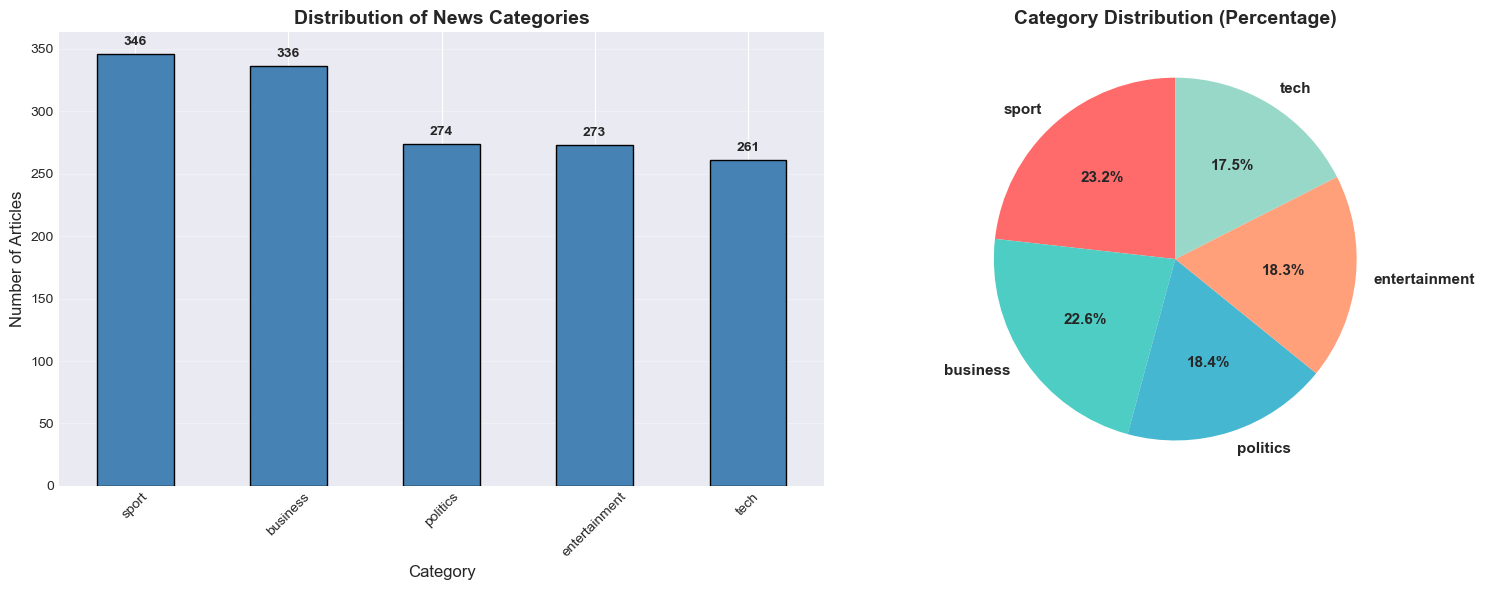


Class Balance Ratio (min/max): 0.75
✓ Classes are relatively balanced.


In [26]:
# Visualize category distribution with a bar plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
category_counts.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Distribution of News Categories', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Category', fontsize=12)
axes[0].set_ylabel('Number of Articles', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(category_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
axes[1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Category Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Check for class imbalance
print(f"\nClass Balance Ratio (min/max): {category_counts.min() / category_counts.max():.2f}")
if category_counts.min() / category_counts.max() < 0.5:
    print(" Warning: Significant class imbalance detected!")
else:
    print("✓ Classes are relatively balanced.")

### Text Length Analysis

- Analyzing the length of articles helps us understand the text data characteristics.

In [28]:
# Calculate text length statistics
train_df['text_length'] = train_df['Text'].apply(len)
train_df['word_count'] = train_df['Text'].apply(lambda x: len(str(x).split()))
train_df['sentence_count'] = train_df['Text'].apply(lambda x: len(str(x).split('.')))

# Display statistics by category
print("Text Length Statistics by Category:")
print("=" * 60)
length_stats = train_df.groupby('Category')[['text_length', 'word_count', 'sentence_count']].describe()
print(length_stats)

Text Length Statistics by Category:
              text_length                                                     \
                    count         mean          std     min      25%     50%   
Category                                                                       
business            336.0  1983.104167   790.180447   846.0  1486.25  1830.5   
entertainment       273.0  1910.380952  1142.478958   866.0  1312.00  1571.0   
politics            274.0  2617.905109  1448.447009   501.0  1867.00  2599.5   
sport               346.0  1894.624277  1051.814635   719.0  1199.00  1641.0   
tech                261.0  2939.291188  1215.569461  1003.0  2031.00  2657.0   

                                word_count                                 \
                   75%      max      count        mean         std    min   
Category                                                                    
business       2331.00   5406.0      336.0  334.169643  133.527272  145.0   
entertainment  

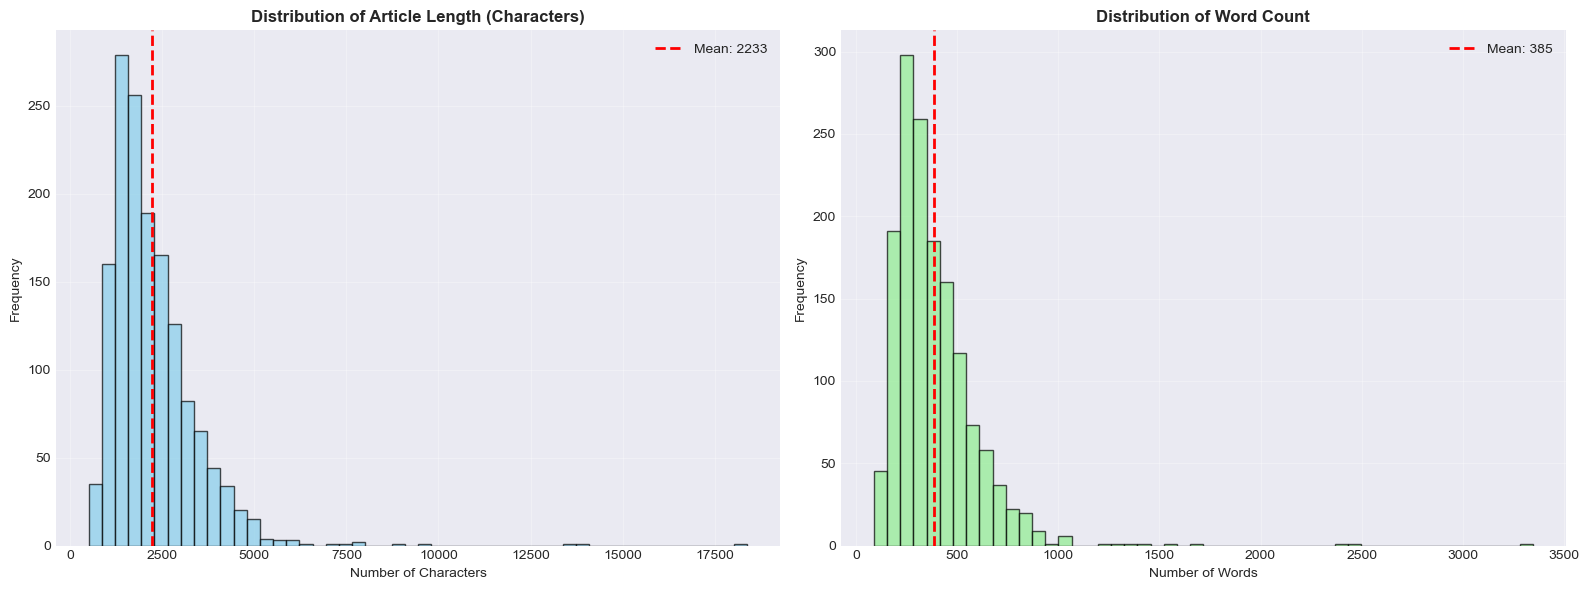

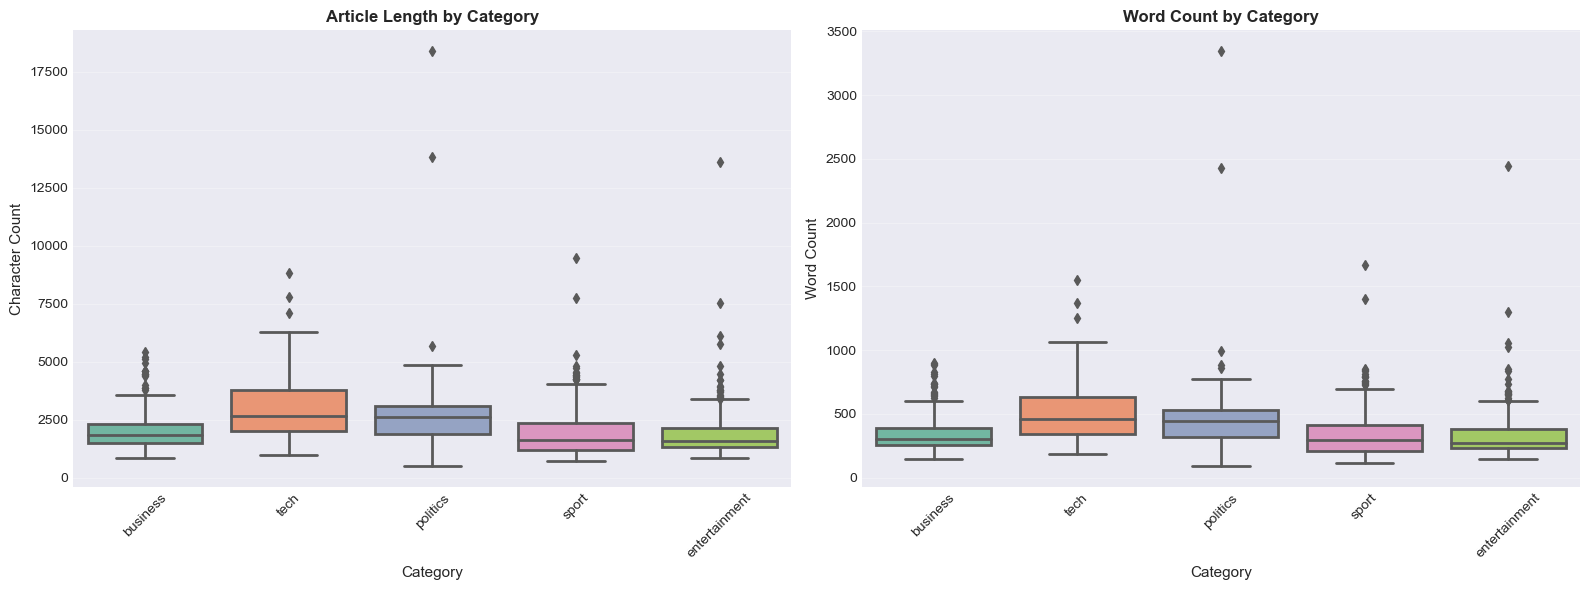

In [80]:

# ────────────────────────────────────────────────────────────
# FIGURE 1: Histograms
# ────────────────────────────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Character length histogram
axes[0].hist(train_df['text_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Article Length (Characters)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Number of Characters')
axes[0].set_ylabel('Frequency')
axes[0].axvline(train_df['text_length'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {train_df["text_length"].mean():.0f}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Word count histogram
axes[1].hist(train_df['word_count'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Word Count', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')
axes[1].axvline(train_df['word_count'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {train_df["word_count"].mean():.0f}')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()  # Show histograms first!

# ────────────────────────────────────────────────────────────
# FIGURE 2: Boxplots
# ────────────────────────────────────────────────────────────
fig2, axes2 = plt.subplots(1, 2, figsize=(16, 6))  # Note: Different variable names!

# Boxplot 1: Character Length by Category
sns.boxplot(data=train_df, x='Category', y='text_length', ax=axes2[0], 
            palette='Set2', linewidth=2)
axes2[0].set_title('Article Length by Category', fontsize=12, fontweight='bold')
axes2[0].set_xlabel('Category', fontsize=11)
axes2[0].set_ylabel('Character Count', fontsize=11)
axes2[0].tick_params(axis='x', rotation=45)
axes2[0].grid(axis='y', alpha=0.3)

# Boxplot 2: Word Count by Category
sns.boxplot(data=train_df, x='Category', y='word_count', ax=axes2[1], 
            palette='Set2', linewidth=2)
axes2[1].set_title('Word Count by Category', fontsize=12, fontweight='bold')
axes2[1].set_xlabel('Category', fontsize=11)
axes2[1].set_ylabel('Word Count', fontsize=11)
axes2[1].tick_params(axis='x', rotation=45)
axes2[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()  







### Data Cleaning Procedures

- Before processing text data, we need to clean and standardize it.

In [83]:
# Define text cleaning function
def clean_text(text):
    """
    Clean and preprocess text data.
    
    Steps:
    1. Convert to lowercase
    2. Remove special characters and digits
    3. Remove extra whitespace
    
    Args:
        text (str): Raw text to clean
    
    Returns:
        str: Cleaned text
    """
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove special characters and digits, keep only letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply cleaning to training data
print("Cleaning training data...")
train_df['Text_Clean'] = train_df['Text'].apply(clean_text)

# Apply cleaning to test data
print("Cleaning test data...")
test_df['Text_Clean'] = test_df['Text'].apply(clean_text)

print("✓ Text cleaning completed!")


Cleaning training data...
Cleaning test data...
✓ Text cleaning completed!


In [85]:
# Compare original vs cleaned text
print("Example of Text Cleaning:")
print("=" * 80)
print("ORIGINAL TEXT:")
print(train_df['Text'].iloc[0][:300])
print("\n" + "=" * 80)
print("CLEANED TEXT:")
print(train_df['Text_Clean'].iloc[0][:300])

Example of Text Cleaning:
ORIGINAL TEXT:
worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at th

CLEANED TEXT:
worldcom exboss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness cynthia cooper worldcom s exhead of internal accounting alerted directors to irregular accounting practices at the us t


### Word Frequency Analysis

- Analyzing the most common words helps us understand the vocabulary and potential distinguishing features.

In [88]:
# Get English stopwords
stop_words = set(stopwords.words('english'))

# Function to get word frequency
def get_top_words(texts, n=20, remove_stopwords=True):
    """
    Get the most frequent words from a collection of texts.
    
    Args:
        texts: Series of text documents
        n: Number of top words to return
        remove_stopwords: Whether to exclude stopwords
    
    Returns:
        Counter object with word frequencies
    """
    all_words = []
    for text in texts:
        words = str(text).lower().split()
        if remove_stopwords:
            words = [w for w in words if w not in stop_words and len(w) > 2]
        all_words.extend(words)
    
    return Counter(all_words).most_common(n)

# Get top words overall
top_words_all = get_top_words(train_df['Text_Clean'], n=30)
print("Top 30 Most Frequent Words (Excluding Stopwords):")
print("=" * 60)
for word, count in top_words_all:
    print(f"{word:20s} : {count:5d}")

Top 30 Most Frequent Words (Excluding Stopwords):
said                 :  4838
would                :  1711
also                 :  1426
new                  :  1334
people               :  1322
year                 :  1228
one                  :  1158
could                :  1032
first                :   892
last                 :   883
two                  :   816
world                :   793
time                 :   756
government           :   746
years                :   644
film                 :   616
best                 :   604
make                 :   597
told                 :   591
get                  :   577
made                 :   575
many                 :   561
game                 :   560
three                :   535
number               :   528
like                 :   524
music                :   512
labour               :   509
next                 :   509
back                 :   500


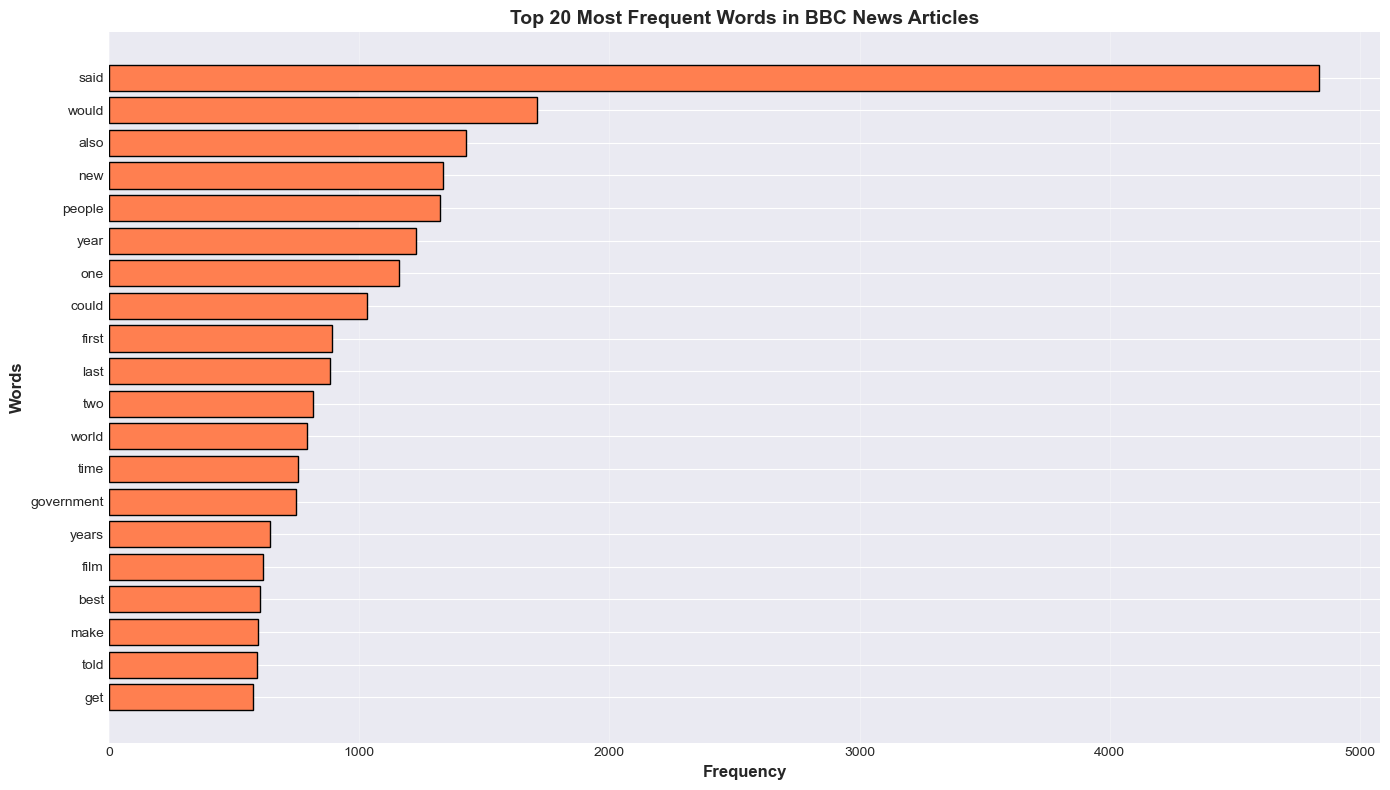

In [43]:
# Visualize top words
words, counts = zip(*top_words_all[:20])

plt.figure(figsize=(14, 8))
plt.barh(range(len(words)), counts, color='coral', edgecolor='black')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency', fontsize=12, fontweight='bold')
plt.ylabel('Words', fontsize=12, fontweight='bold')
plt.title('Top 20 Most Frequent Words in BBC News Articles', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

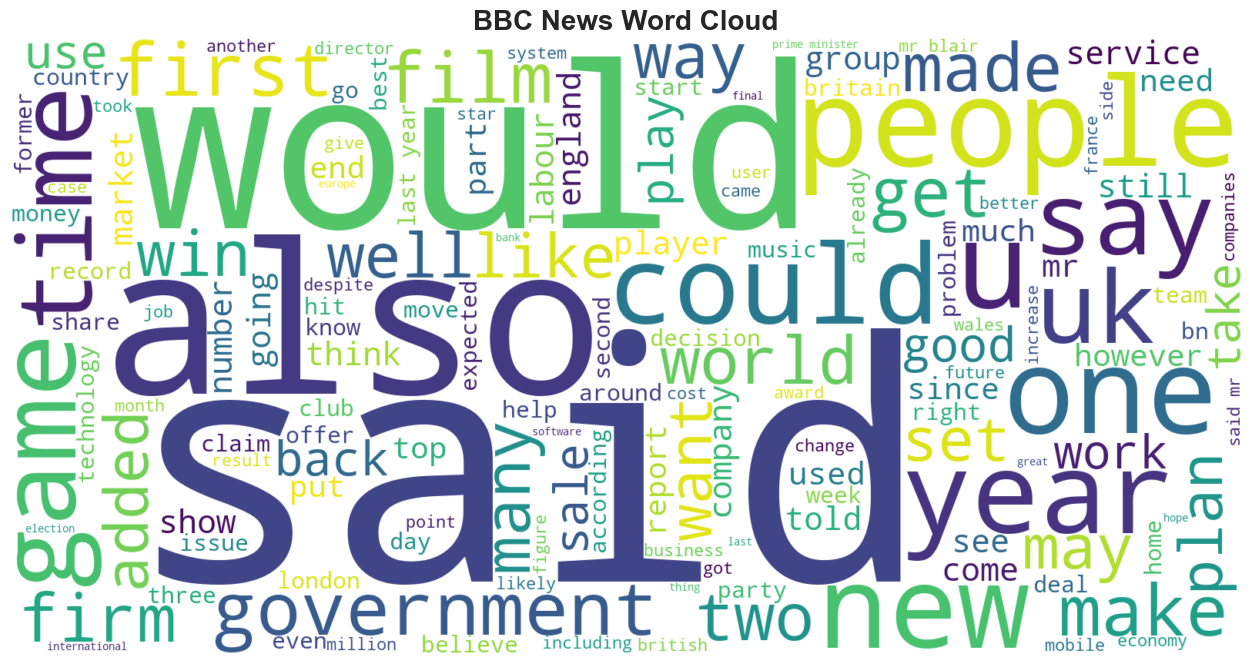

In [90]:
# Generate word cloud for all articles
all_text = ' '.join(train_df['Text_Clean'].values)
wordcloud = WordCloud(width=1600, height=800, background_color='white',
                      stopwords=stop_words, max_words=150, 
                      colormap='viridis').generate(all_text)

# Display
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('BBC News Word Cloud', fontsize=20, fontweight='bold')
plt.show()

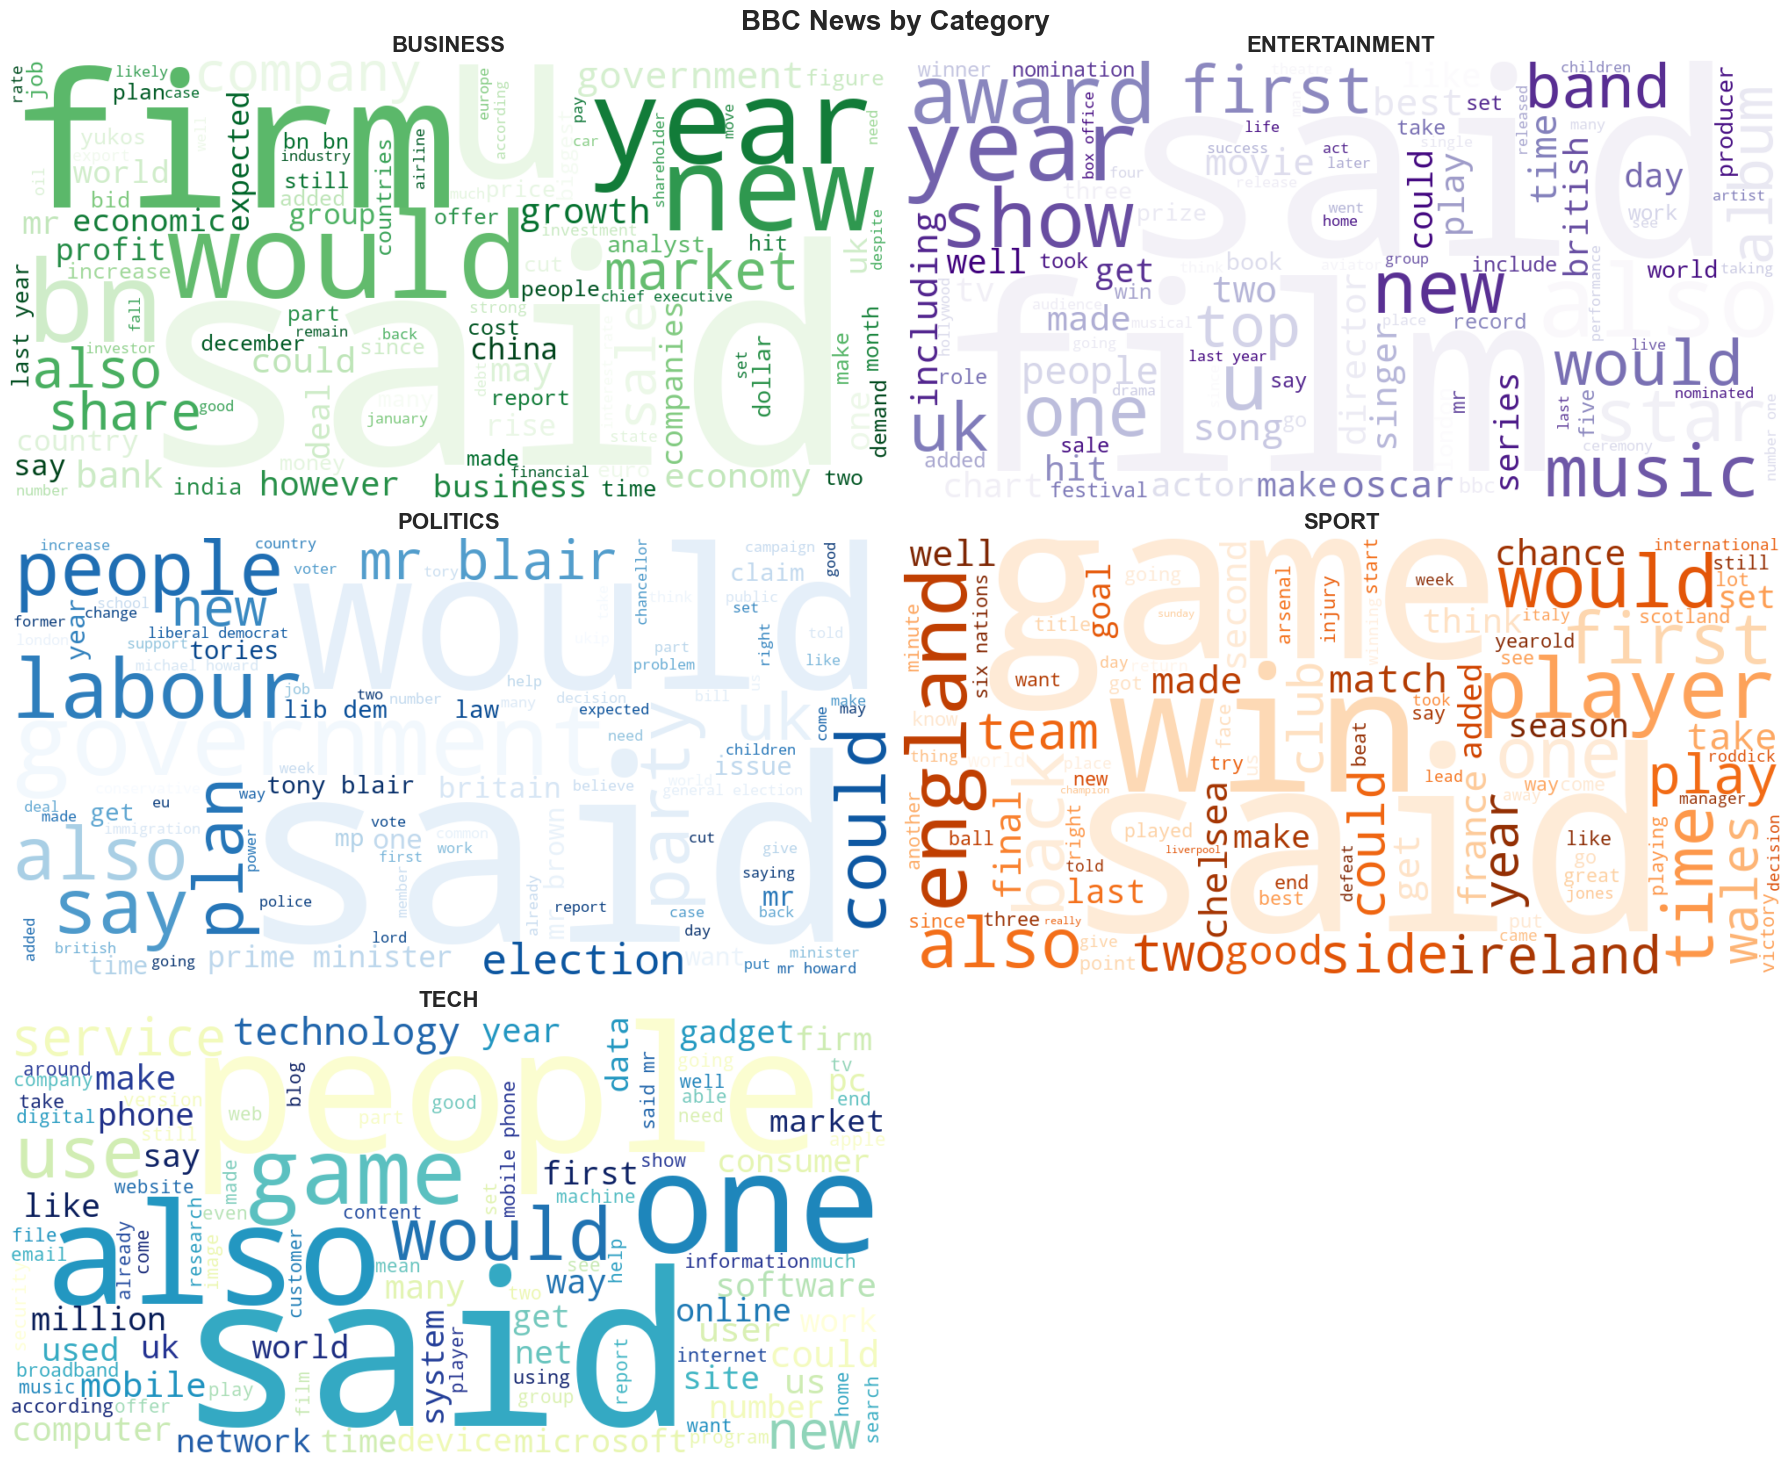

In [92]:
# ═══════════════════════════════════════════════════════════
# WORD CLOUDS BY CATEGORY (5 PLOTS)
# ═══════════════════════════════════════════════════════════

# Configuration
categories = ['business', 'entertainment', 'politics', 'sport', 'tech']
colormaps = ['Greens', 'Purples', 'Blues', 'Oranges', 'YlGnBu']

# Create plots
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.ravel()

for idx, (cat, cmap) in enumerate(zip(categories, colormaps)):
    # Get category text
    cat_text = ' '.join(train_df[train_df['Category'].str.lower() == cat]['Text_Clean'].values)
    
    # Generate word cloud
    wc = WordCloud(width=1000, height=500, background_color='white',
                   stopwords=stop_words, max_words=100, 
                   colormap=cmap, random_state=42).generate(cat_text)
    
    # Plot
    axes[idx].imshow(wc, interpolation='bilinear')
    axes[idx].axis('off')
    axes[idx].set_title(cat.upper(), fontsize=16, fontweight='bold')

axes[-1].axis('off')  # Hide extra subplot
plt.suptitle('BBC News by Category', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

### Category-Specific Word Analysis

- Understanding unique vocabulary for each category helps identify distinguishing features.

Top 15 Words by Category:

BUSINESS:
  said            : 1100
  year            :  417
  would           :  308
  also            :  279
  market          :  278
  new             :  273
  firm            :  261
  growth          :  257
  company         :  252
  last            :  235
  economy         :  233
  government      :  214
  bank            :  206
  economic        :  202
  sales           :  200

TECH:
  said            : 1064
  people          :  646
  new             :  349
  also            :  348
  mobile          :  326
  one             :  326
  would           :  322
  could           :  308
  technology      :  303
  users           :  268
  software        :  265
  use             :  257
  music           :  254
  net             :  247
  digital         :  244

POLITICS:
  said            : 1445
  would           :  710
  labour          :  488
  government      :  462
  election        :  396
  blair           :  389
  people          :  372
  party           : 

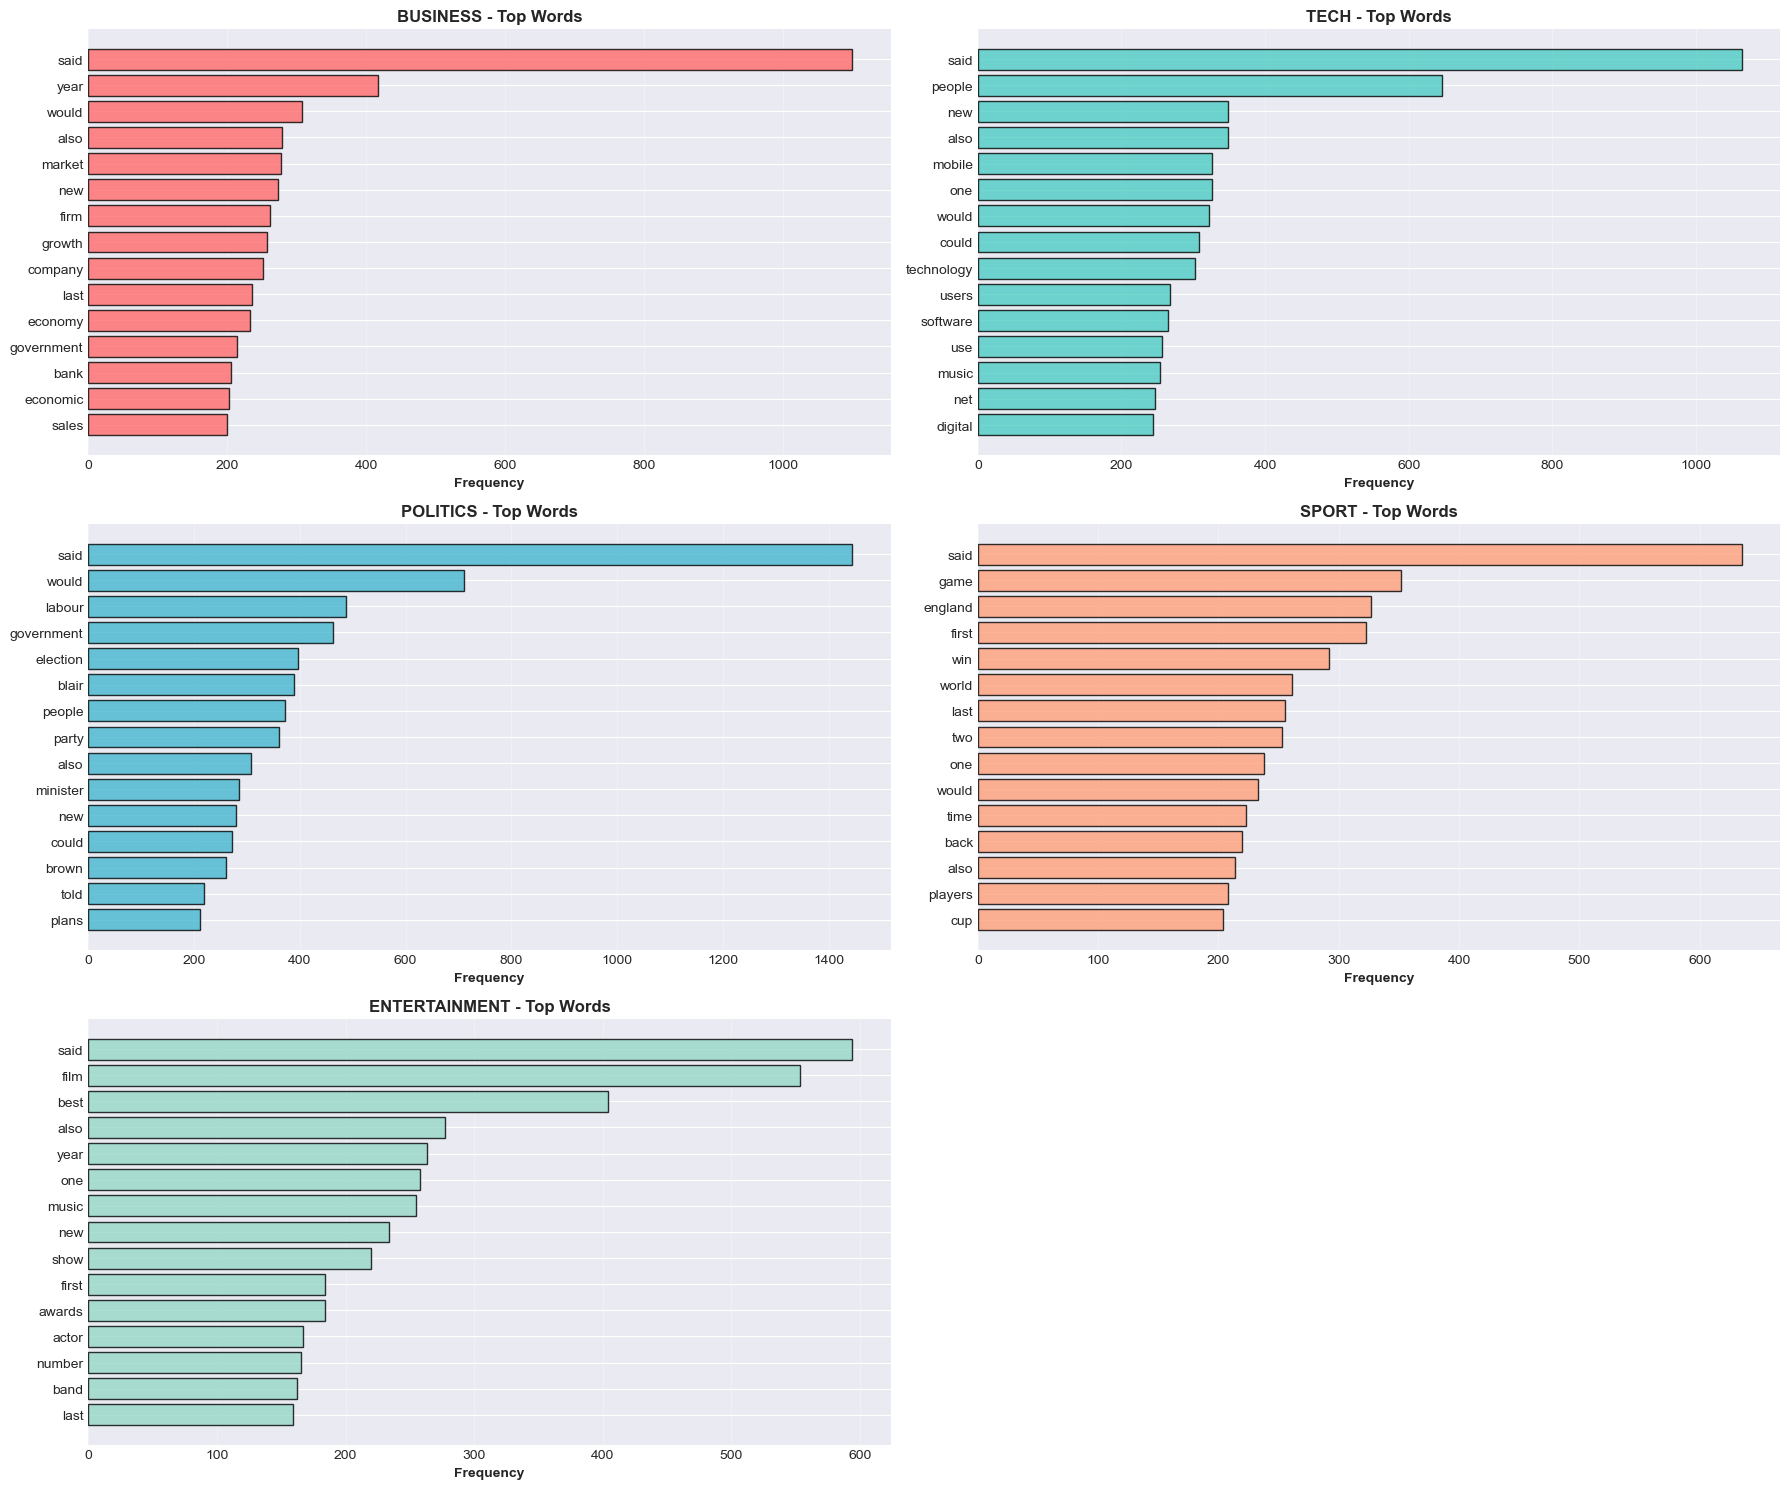

In [95]:
# Get top words for each category
print("Top 15 Words by Category:")
print("=" * 80)

fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.ravel()

categories = train_df['Category'].unique()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

for idx, category in enumerate(categories):
    # Get texts for this category
    category_texts = train_df[train_df['Category'] == category]['Text_Clean']
    
    # Get top words
    top_words_cat = get_top_words(category_texts, n=15)
    
    # Print
    print(f"\n{category.upper()}:")
    for word, count in top_words_cat:
        print(f"  {word:15s} : {count:4d}")
    
    # Plot
    words_cat, counts_cat = zip(*top_words_cat)
    axes[idx].barh(range(len(words_cat)), counts_cat, color=colors[idx], edgecolor='black', alpha=0.8)
    axes[idx].set_yticks(range(len(words_cat)))
    axes[idx].set_yticklabels(words_cat, fontsize=10)
    axes[idx].set_xlabel('Frequency', fontsize=10, fontweight='bold')
    axes[idx].set_title(f'{category.upper()} - Top Words', fontsize=12, fontweight='bold')
    axes[idx].invert_yaxis()
    axes[idx].grid(axis='x', alpha=0.3)

# Hide the extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

### Vocabulary Size Analysis


Vocabulary Size by Category:
        Category  Vocabulary Size
1           tech             9725
4  entertainment             9517
0       business             9295
2       politics             8871
3          sport             8734


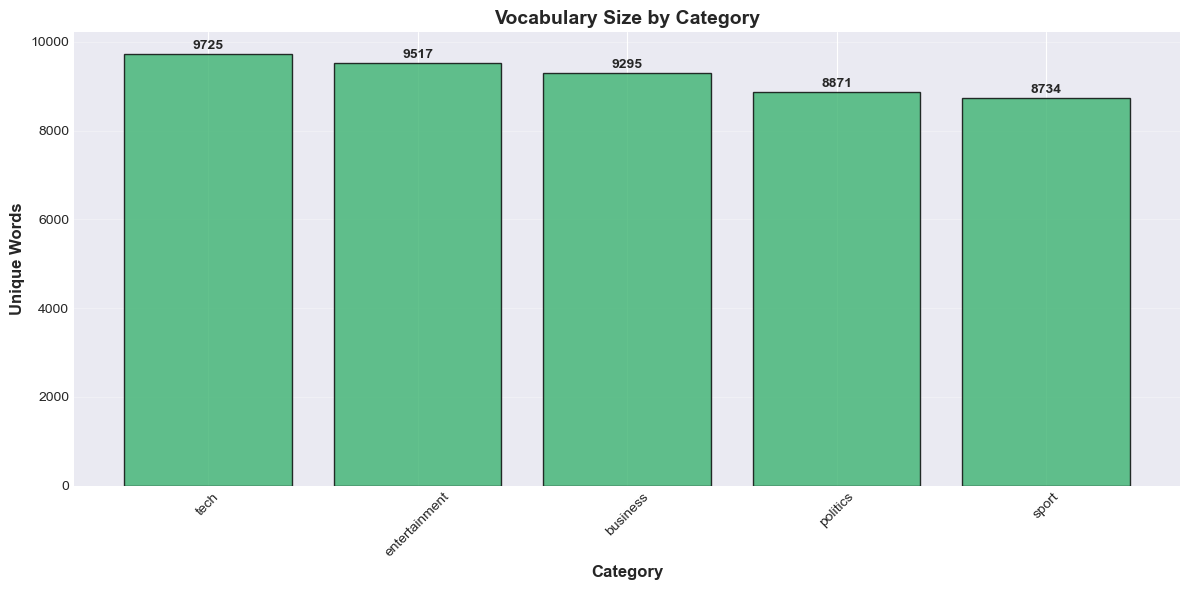

In [98]:
# Calculate vocabulary size for each category
vocab_sizes = {}

for category in train_df['Category'].unique():
    category_texts = train_df[train_df['Category'] == category]['Text_Clean']
    all_words = ' '.join(category_texts).split()
    unique_words = set([w for w in all_words if w not in stop_words and len(w) > 2])
    vocab_sizes[category] = len(unique_words)

# Create DataFrame for visualization
vocab_df = pd.DataFrame(list(vocab_sizes.items()), columns=['Category', 'Vocabulary Size'])
vocab_df = vocab_df.sort_values('Vocabulary Size', ascending=False)

print("\nVocabulary Size by Category:")
print(vocab_df)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(vocab_df['Category'], vocab_df['Vocabulary Size'], color='mediumseagreen', edgecolor='black', alpha=0.8)
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Unique Words', fontsize=12, fontweight='bold')
plt.title('Vocabulary Size by Category', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(vocab_df['Vocabulary Size']):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

---

## Text Feature Extraction - TF-IDF

### Understanding TF-IDF

**TF-IDF (Term Frequency-Inverse Document Frequency)** is a numerical statistic that reflects how important a word is to a document in a collection of documents. It's one of the most popular techniques for converting raw text into numerical features.

#### How TF-IDF Works (In My Own Words):

TF-IDF consists of two components:

1. **Term Frequency (TF)**: Measures how frequently a word appears in a document
   - If a word appears many times in a document, it's likely important to that document
   - Formula: `TF(word, document) = (Number of times word appears in document) / (Total words in document)`

2. **Inverse Document Frequency (IDF)**: Measures how rare a word is across all documents
   - If a word appears in many documents, it's less useful for distinguishing between them
   - If a word appears in few documents, it's more distinctive and informative
   - Formula: `IDF(word) = log(Total number of documents / Number of documents containing the word)`

3. **TF-IDF Score**: The product of TF and IDF
   - Formula: `TF-IDF = TF × IDF`
   - High TF-IDF: Word is frequent in this document but rare in others → Distinctive
   - Low TF-IDF: Word is either rare in this document or common across all documents → Not distinctive

#### Why TF-IDF is Effective:

- **Balances frequency and uniqueness**: Common words like "the" or "and" get low scores because they appear everywhere
- **Identifies distinctive terms**: Words like "touchdown" in sports articles or "parliament" in politics get high scores
- **Creates numerical features**: Converts text into numbers that machine learning algorithms can process
- **Dimension reduction**: Automatically filters out less important words

#### Example:
Consider two documents:
- Doc 1: "The team won the championship"
- Doc 2: "The company won the contract"

- "the" appears in both → Low IDF → Low TF-IDF (not distinctive)
- "championship" appears only in Doc 1 → High IDF → High TF-IDF in Doc 1 (very distinctive)
- "team" and "company" are distinctive for their respective documents

### Implementing TF-IDF

In [102]:
# Initialize TF-IDF Vectorizer
# Parameters explained:
# - max_features: Keep only top N most important features (reduces dimensionality)
# - ngram_range: (1,2) means include both single words and two-word phrases
# - min_df: Ignore words that appear in fewer than 2 documents (filters rare words)
# - max_df: Ignore words that appear in more than 90% of documents (filters common words)
# - stop_words: Remove common English words like 'the', 'a', 'is'

tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.9,
    stop_words='english',
    sublinear_tf=True  # Apply logarithmic scaling to term frequency
)

print("TF-IDF Vectorizer initialized with parameters:")
print(f"  - Maximum features: {tfidf_vectorizer.max_features}")
print(f"  - N-gram range: {tfidf_vectorizer.ngram_range}")
print(f"  - Minimum document frequency: {tfidf_vectorizer.min_df}")
print(f"  - Maximum document frequency: {tfidf_vectorizer.max_df}")

TF-IDF Vectorizer initialized with parameters:
  - Maximum features: 5000
  - N-gram range: (1, 2)
  - Minimum document frequency: 2
  - Maximum document frequency: 0.9


In [104]:
# Fit and transform training data
print("\nTransforming training data to TF-IDF features...")
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['Text_Clean'])

# Transform test data (using the same vocabulary from training)
print("Transforming test data to TF-IDF features...")
X_test_tfidf = tfidf_vectorizer.transform(test_df['Text_Clean'])

print(f"\n✓ TF-IDF transformation completed!")
print(f"  - Training data shape: {X_train_tfidf.shape}")
print(f"  - Test data shape: {X_test_tfidf.shape}")
print(f"  - Number of features (vocabulary size): {len(tfidf_vectorizer.get_feature_names_out())}")
print(f"  - Sparsity: {(1 - X_train_tfidf.nnz / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1])):.4f}")


Transforming training data to TF-IDF features...
Transforming test data to TF-IDF features...

✓ TF-IDF transformation completed!
  - Training data shape: (1490, 5000)
  - Test data shape: (735, 5000)
  - Number of features (vocabulary size): 5000
  - Sparsity: 0.9775


### Analyzing TF-IDF Features

In [107]:
# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

print(f"Total number of TF-IDF features: {len(feature_names)}")
print(f"\nFirst 20 features: {feature_names[:20]}")
print(f"Last 20 features: {feature_names[-20:]}")

Total number of TF-IDF features: 5000

First 20 features: ['abc' 'ability' 'able' 'abroad' 'absence' 'absolute' 'absolutely' 'abuse'
 'abused' 'ac' 'academy' 'academy awards' 'accept' 'acceptable' 'accepted'
 'access' 'accessible' 'accident' 'according' 'according figures']
Last 20 features: ['yearold' 'yearolds' 'years' 'years ago' 'years said' 'yen' 'yes' 'york'
 'yorkshire' 'young' 'young people' 'younger' 'youngsters' 'yuan'
 'yugansk' 'yuganskneftegas' 'yukos' 'zealand' 'zero' 'zone']


In [109]:
# Analyze top TF-IDF scores for each category
def get_top_tfidf_features(category, top_n=10):
    """
    Get the top TF-IDF features for a specific category.
    """
    # Get indices for this category
    cat_indices = train_df[train_df['Category'] == category].index
    
    # Get TF-IDF vectors for this category
    cat_tfidf = X_train_tfidf[cat_indices]
    
    # Calculate mean TF-IDF score for each feature
    mean_tfidf = np.array(cat_tfidf.mean(axis=0)).ravel()
    
    # Get top features
    top_indices = mean_tfidf.argsort()[-top_n:][::-1]
    top_features = [(feature_names[i], mean_tfidf[i]) for i in top_indices]
    
    return top_features

# Display top TF-IDF features for each category
print("Top 10 TF-IDF Features by Category:")
print("=" * 80)

for category in train_df['Category'].unique():
    print(f"\n{category.upper()}:")
    top_features = get_top_tfidf_features(category, top_n=10)
    for feature, score in top_features:
        print(f"  {feature:25s} : {score:.4f}")

Top 10 TF-IDF Features by Category:

BUSINESS:
  bn                        : 0.0496
  said                      : 0.0410
  market                    : 0.0316
  firm                      : 0.0314
  year                      : 0.0309
  company                   : 0.0308
  growth                    : 0.0306
  economy                   : 0.0283
  shares                    : 0.0281
  bank                      : 0.0262

TECH:
  people                    : 0.0431
  users                     : 0.0381
  technology                : 0.0351
  said                      : 0.0349
  software                  : 0.0348
  use                       : 0.0300
  mobile                    : 0.0297
  digital                   : 0.0289
  computer                  : 0.0282
  net                       : 0.0279

POLITICS:
  mr                        : 0.0570
  labour                    : 0.0495
  election                  : 0.0462
  government                : 0.0438
  blair                     : 0.0431
  said    

---

## EDA Summary and Analysis Plan

### Key Findings from EDA:

1. **Dataset Characteristics:**
   - Training set contains ~1,490 articles across 5 categories
   - Test set contains ~735 articles
   - No missing values detected
   - Classes are relatively balanced (good for modeling)

2. **Text Characteristics:**
   - Articles vary in length (200-600 words typically)
   - Different categories show distinct word length patterns
   - Each category has unique vocabulary and distinctive terms

3. **Feature Extraction:**
   - Successfully converted text to 5,000 TF-IDF features
   - Identified category-specific high-scoring terms
   - Sparse matrix structure (most features are zero for any document)

4. **Category-Specific Insights:**
   - **Business**: Terms like "company," "market," "sales," "shares"
   - **Entertainment**: Terms like "film," "music," "show," "star"
   - **Politics**: Terms like "labour," "election," "minister," "party"
   - **Sport**: Terms like "game," "win," "match," "team"
   - **Tech**: Terms like "technology," "software," "digital," "internet"

### Plan of Analysis:

#### Phase 1: Matrix Factorization (Unsupervised Learning)
1. Apply **Non-negative Matrix Factorization (NMF)** to TF-IDF matrix
   - Decompose document-term matrix into latent topics
   - Identify the optimal number of components (topics)
   - Interpret discovered topics

2. Build NMF-based classifier
   - Use topic distributions as features
   - Map topics to categories
   - Evaluate performance

#### Phase 2: Supervised Learning (Comparison)
1. Train multiple supervised classifiers:
   - Logistic Regression
   - Naive Bayes
   - Random Forest
   - Support Vector Machine

2. Perform hyperparameter tuning using GridSearchCV

3. Compare performance metrics:
   - Accuracy
   - Precision, Recall, F1-Score
   - Confusion Matrix

#### Phase 3: Evaluation and Interpretation
1. Compare NMF vs. supervised approaches
2. Analyze errors and misclassifications
3. Generate predictions for the test set
4. Prepare submission

### Next Steps:
- Proceed to implement NMF for topic modeling
- Build and evaluate classification models
- Compare unsupervised vs. supervised performance

---

## References

1. **TF-IDF and Text Processing:**
   - Scikit-learn Documentation: TfidfVectorizer. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
   - Ramos, J. (2003). Using TF-IDF to Determine Word Relevance in Document Queries.

2. **Matrix Factorization:**
   - Lee, D. D., & Seung, H. S. (1999). Learning the parts of objects by non-negative matrix factorization. Nature, 401(6755), 788-791.
   - Scikit-learn Documentation: Non-negative Matrix Factorization. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

3. **Document Classification:**
   - Google Cloud Blog: Problem-solving with ML: automatic document classification. https://cloud.google.com/blog/products/ai-machine-learning/problem-solving-with-ml-automatic-document-classification
   - Aggarwal, C. C., & Zhai, C. (2012). A survey of text classification algorithms. In Mining text data (pp. 163-222). Springer.

4. **BBC News Dataset:**
   - D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.

5. **Natural Language Processing:**
   - Bird, S., Klein, E., & Loper, E. (2009). Natural Language Processing with Python. O'Reilly Media.
   - NLTK Documentation. https://www.nltk.org/

---

*This notebook will be continued with matrix factorization implementation and model building in subsequent cells.*

In [111]:
import joblib

# Save all data
joblib.dump(X_train_tfidf, 'X_train_tfidf.pkl', compress=3)
joblib.dump(X_test_tfidf, 'X_test_tfidf.pkl', compress=3)
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
train_df.to_pickle('train_df.pkl')
test_df.to_pickle('test_df.pkl')

print("✓ Part 1 data saved!")

✓ Part 1 data saved!


## Conclusion — Part 1 EDA Only

**Corpus condition.** The BBC dataset is clean and reasonably balanced across the five labels, with no material missing values. Articles show a wide length range with a long right tail, which justifies capping very long documents to avoid dominance in downstream feature spaces.

**Text characteristics.** Raw text contains normalization artifacts (e.g., apostrophe splits like `it s`) and abundant function words; after minimal cleaning and stop-word removal, the vocabulary surfaces clear, domain-specific terms and bigrams (e.g., *prime minister*, *stock market*, *world cup*). Named entities (people, teams, places) appear frequently and are likely to be discriminative—so we will **not** filter against generic English dictionaries that would remove them.

**Visual patterns.**  
- Class counts are relatively even → accuracy and stratified splits are appropriate.  
- Word/character length distributions vary by category but with overlapping ranges → no special per-class normalization is required beyond global truncation.  
- Top-term inspections reveal meaningful content words per category and also hint at potential **leakage phrases** (e.g., editorial boilerplate like *bbc sport/news*), which we will watch for and, if necessary, exclude.

**Feature representation choice.** EDA supports using **TF–IDF (unigrams + bigrams)** with light thresholds (`min_df`, `max_df`) and `sublinear_tf=True` to emphasize informative terms while suppressing ubiquitous ones. This representation preserves interpretability of topic words and phrases.

**Plan of analysis informed by EDA (for next steps, not executed here):**  
1. Finalize a minimal cleaner (lowercase, punctuation/digit removal, whitespace normalize, stop-words removed) with a ~1,000-word cap.  
2. Build TF–IDF (1–2 grams) fitted on training text only, monitoring for leakage tokens.  
3. Proceed to modeling (NMF topic exploration and supervised baselines) using the TF–IDF features, reporting confusion matrices and brief error notes.

**Bottom line.** The EDA indicates a healthy, balanced corpus with clear, category-specific vocabulary. A simple, interpretable cleaning pipeline plus TF–IDF features provides a solid foundation for subsequent modeling.
